In [2]:
#Heart Disease Prediction
# -- Data Gathering
# -- Data Preparation
# -- Data Preprocessing
# -- Data Transformation
# -- Model Building
# -- Model Evaluation
# -- Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [20]:
data = {
    'age': [63, 67, 67, 37, 41],
    'sex': [1, 1, 1, 1, 0],
    'cp': [1, 4, 4, 3, 2],
    'trestbps': [145, 160, 120, 130, 130],
    'chol': [233, 286, 229, 250, 204],
    'fbs': [1, 0, 0, 0, 0],
    'restecg': [2, 2, 2, 0, 2],
    'thalach': [150, 108, 129, 187, 172],
    'exang': [0, 1, 1, 0, 0],
    'oldpeak': [2.3, 1.5, 2.6, 3.5, 1.4],
    'slope': [3, 2, 2, 3, 1],
    'ca': [0, 3, 2, 0, 0],
    'thal': [6, 3, 7, 3, 3],
    'target': [1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,1


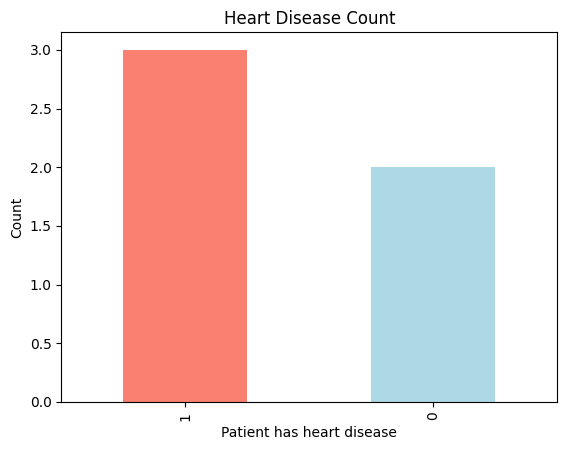

In [21]:
df.target.value_counts().plot(kind = 'bar' , color=['salmon','lightblue'])
plt.xlabel('Patient has heart disease')
plt.ylabel('Count')
plt.title('Heart Disease Count')
plt.show()

In [22]:
# Step 3: Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       5 non-null      int64  
 1   sex       5 non-null      int64  
 2   cp        5 non-null      int64  
 3   trestbps  5 non-null      int64  
 4   chol      5 non-null      int64  
 5   fbs       5 non-null      int64  
 6   restecg   5 non-null      int64  
 7   thalach   5 non-null      int64  
 8   exang     5 non-null      int64  
 9   oldpeak   5 non-null      float64
 10  slope     5 non-null      int64  
 11  ca        5 non-null      int64  
 12  thal      5 non-null      int64  
 13  target    5 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 692.0 bytes


In [23]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


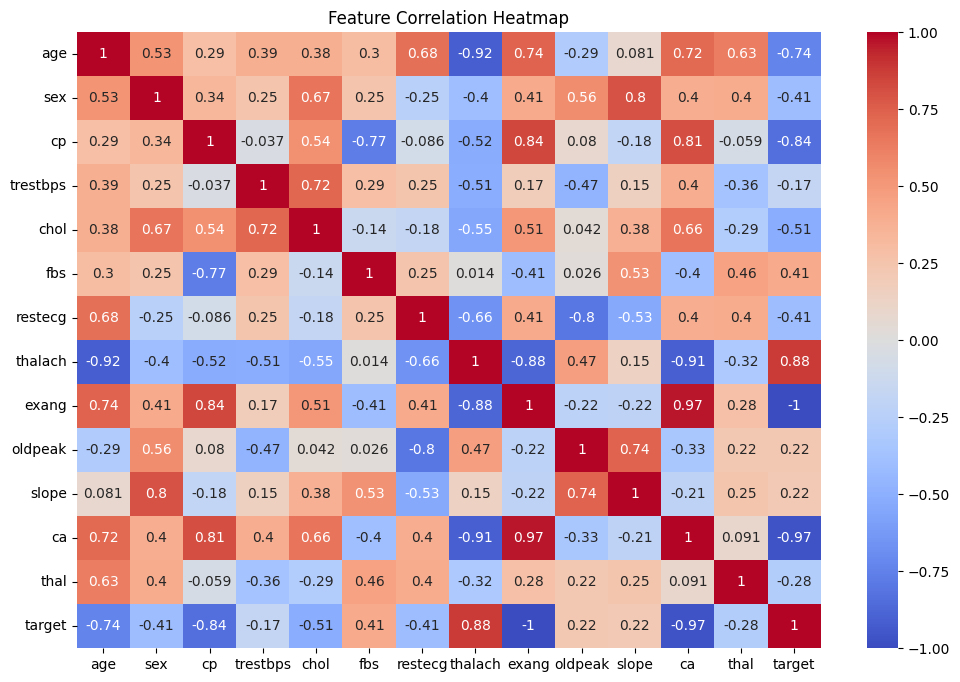

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
# Step 6: Split features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


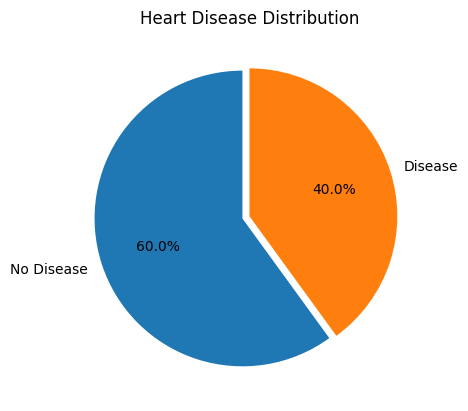

In [28]:
df['target'].value_counts().plot.pie(autopct="%1.1f%%", labels=['No Disease', 'Disease'], startangle=90, explode=(0.05, 0))
plt.title("Heart Disease Distribution")
plt.ylabel("")
plt.show()


<ipython-input-29-1675487541>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='oldpeak', data=df, palette='Set2')


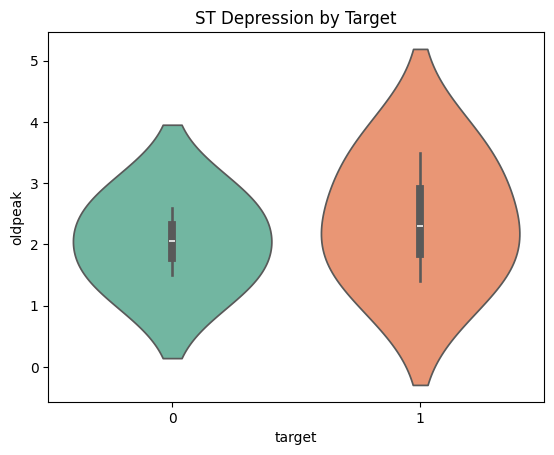

In [29]:
sns.violinplot(x='target', y='oldpeak', data=df, palette='Set2')
plt.title("ST Depression by Target")
plt.show()


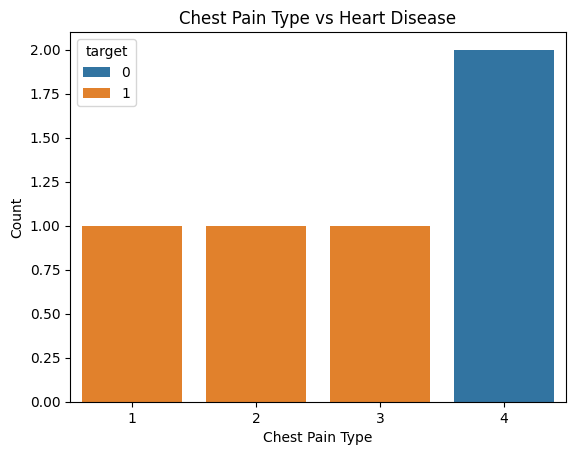

In [31]:
sns.countplot(data=df, x='cp', hue='target')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()


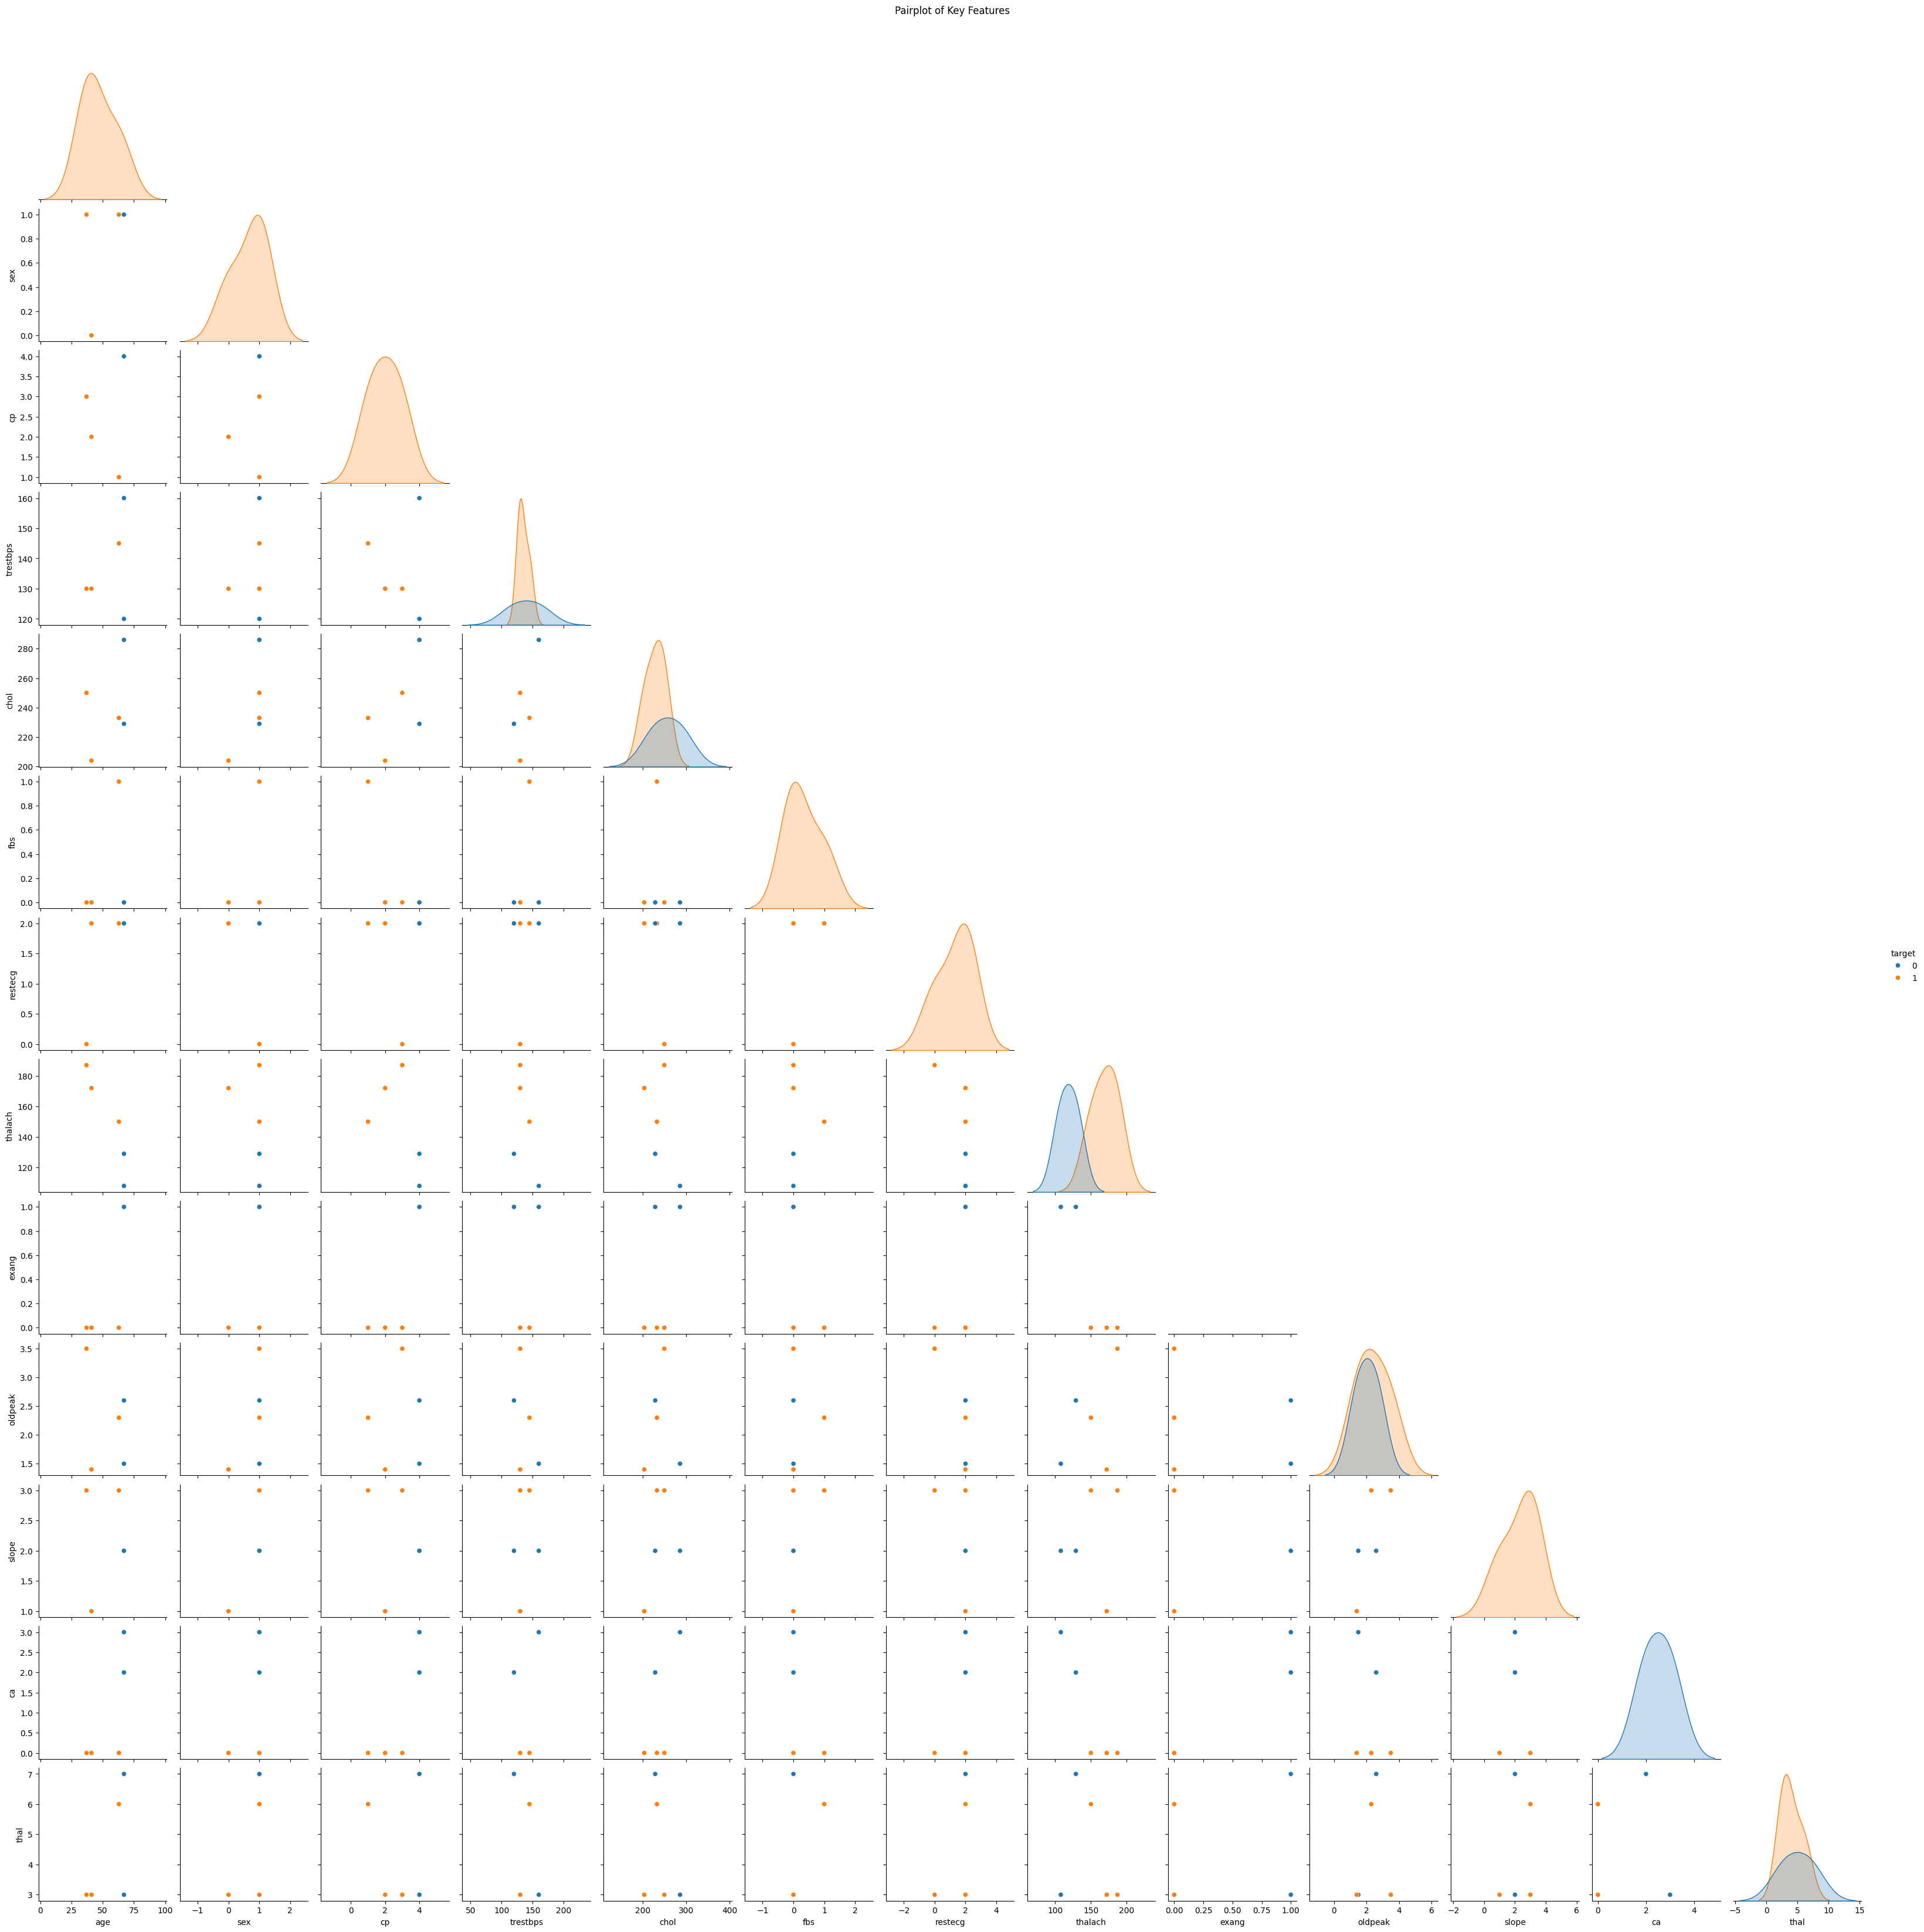

In [32]:
sns.pairplot(df, hue='target', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()
